In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
import admin_functions as adfn
from sklearn import decomposition
sns.reset_orig()
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [226]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))[:3] + sorted(glob.glob('*BLN*_cutrealtrace.npy'))[7:]
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))[:3] + sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))[7:]
blnraw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'])

### Baseline vs seizure power law plots - entire recording
* PC-variance - concenate, or plot together
* Correlation-distance - concatenate, or plot together
* manifold smoothness

In [184]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))
blncor = sorted(glob.glob('*BLN*corr.npy'))
p20cor = sorted(glob.glob('*PTZ20*corr.npy'))
p20pcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_pcavar.npy']

In [4]:
blndis = sorted(glob.glob('*BLN*dis*.npy'))[:2] + sorted(glob.glob('*BLN*dis*.npy'))[4:7] + sorted(glob.glob('*BLN*dis*.npy'))[8:10] 
p20dis = sorted(glob.glob('*PTZ20*dis*.npy'))[:2] + sorted(glob.glob('*PTZ20*dis*.npy'))[4:7] + sorted(glob.glob('*PTZ20*dis*.npy'))[8:10] 
p20dis

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy']

In [11]:
#Calculate entire trace PC-variance
blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
for e in range(len(blnraw)):
    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
    n_components = b_data.shape[1]
    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
    print('Saved fish #' + str(e))

Saved fish #0
Saved fish #1
Saved fish #2
Saved fish #3
Saved fish #4
Saved fish #5
Saved fish #6
Saved fish #7
Saved fish #8
Saved fish #9
Saved fish #10


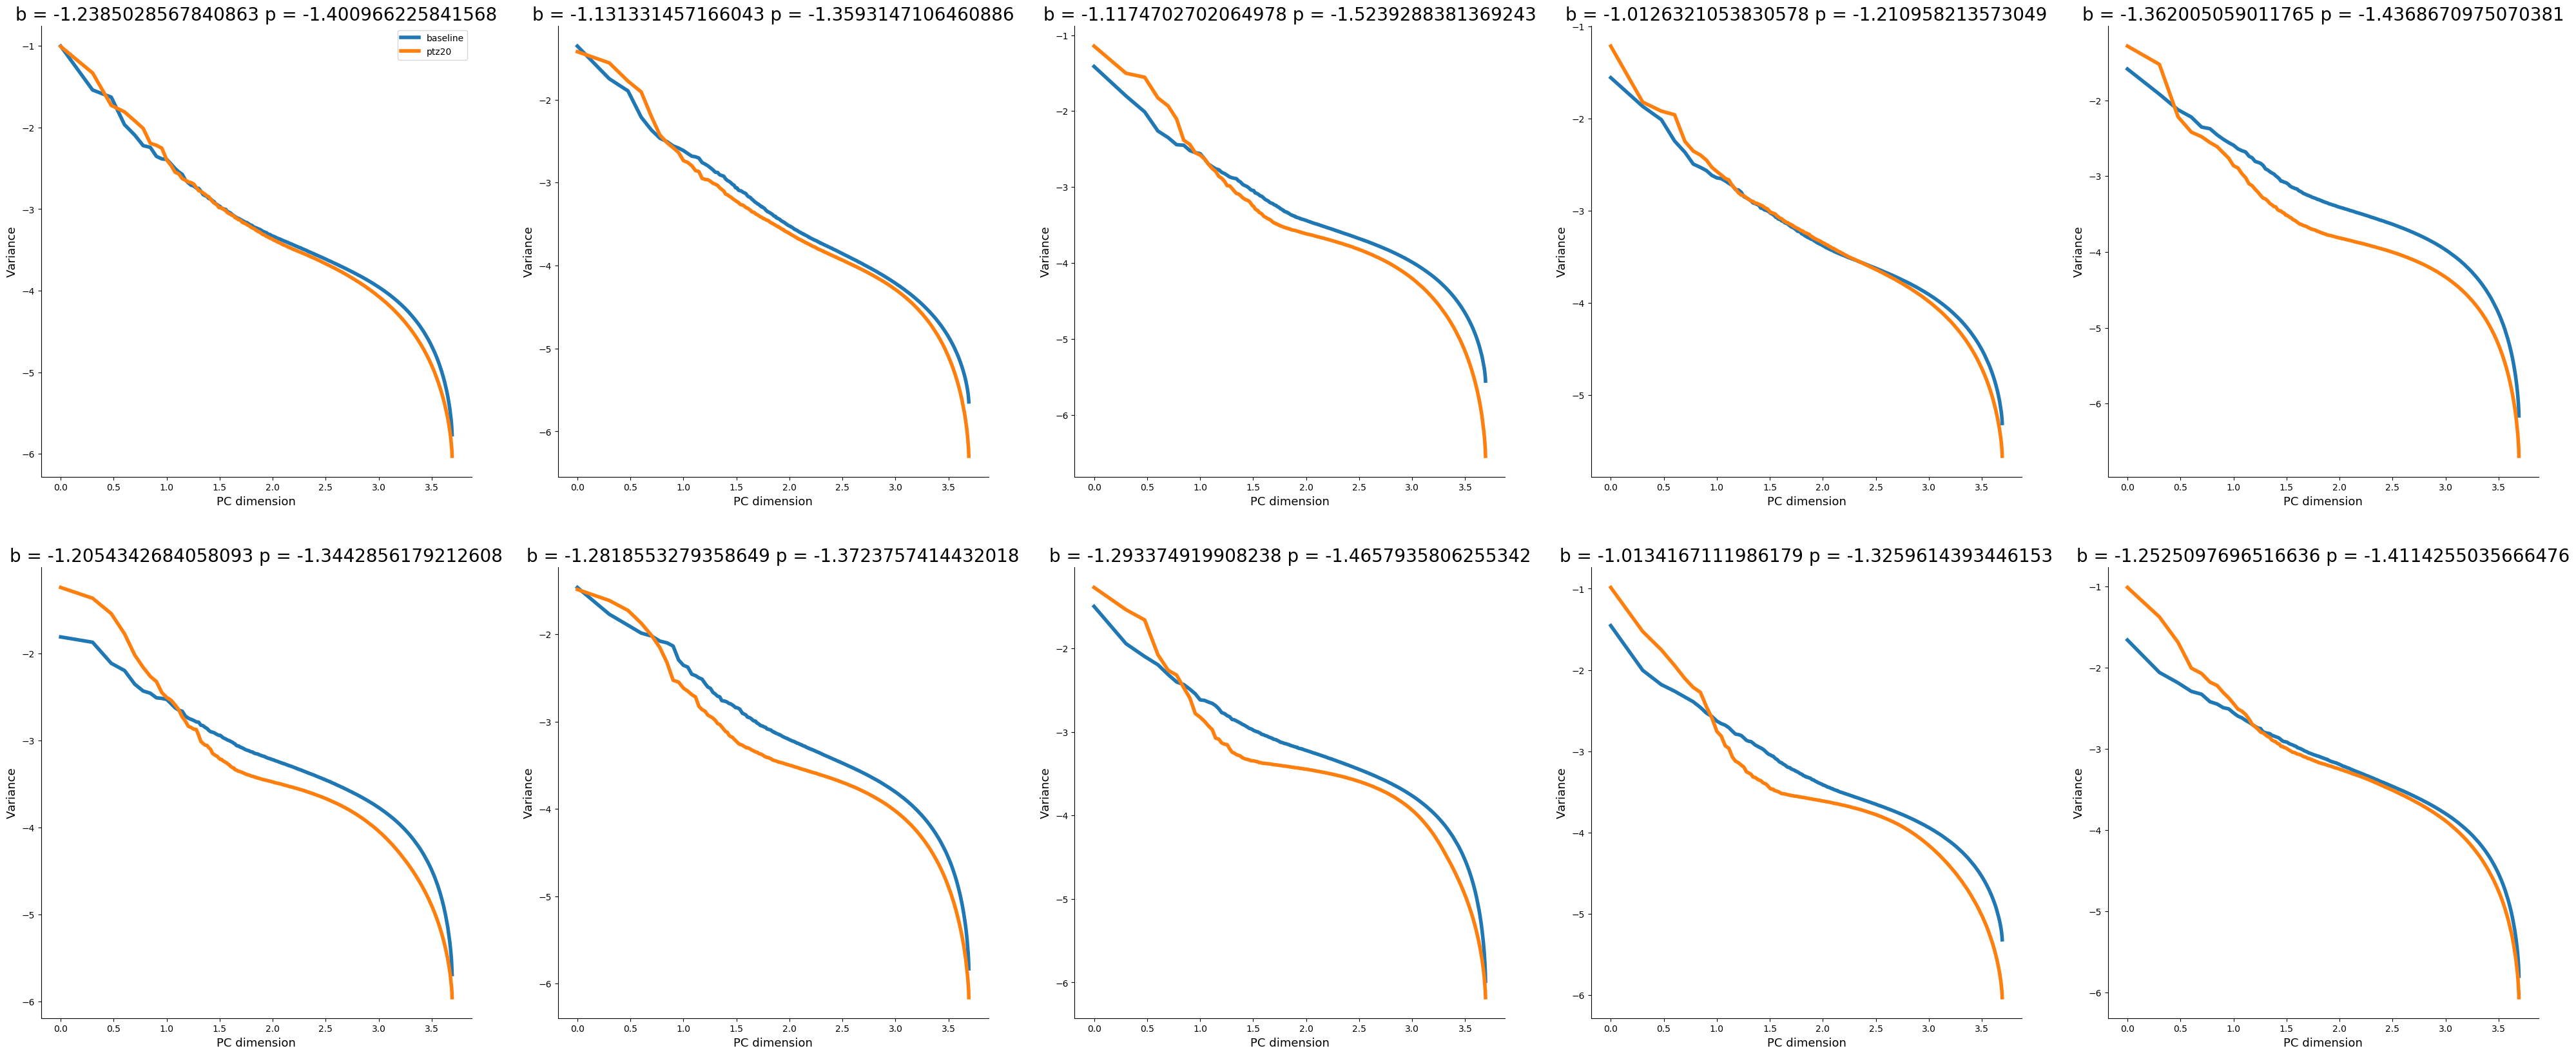

In [63]:
#BASELINE VS PTZ - ENTIRE RECORDING 
import matplotlib
import sys
from scipy import stats
fig, axarr = plt.subplots(2,5, figsize = (50,20))
xcount,ycount = 0,0
for i in range(len(blnpcv)-1):
    xaxis = np.log10(np.linspace(0,np.shape(blnpcv[i])[0], num = np.shape(blnpcv[i])[0]+1))
    yaxis = np.log10(blnpcv[i])
    b_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
    axarr[xcount,ycount].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, label = 'baseline')
    xaxis = np.log10(np.linspace(0,np.shape(p20pcv[i])[0], num = np.shape(p20pcv[i])[0]+1))
    yaxis = np.log10(p20pcv[i])
    p_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
    axarr[xcount,ycount].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, label = 'ptz20')
    axarr[xcount,ycount].set_ylabel('Variance', size = '13')
    axarr[xcount,ycount].set_xlabel('PC dimension', size = '13')
    axarr[xcount,ycount].get_xaxis().set_major_formaatter(matplotlib.ticker.ScalarFormatter())
    axarr[xcount,ycount].spines['top'].set_visible(False)
    axarr[xcount,ycount].spines['right'].set_visible(False)
    axarr[xcount,ycount].set_title('b = ' + str(b_slope) + ' p = ' + str(p_slope), size = 20)
    axarr[0,0].legend()
    ycount+=1
    if i == 4:
        xcount = 1
        ycount=0
plt.show()

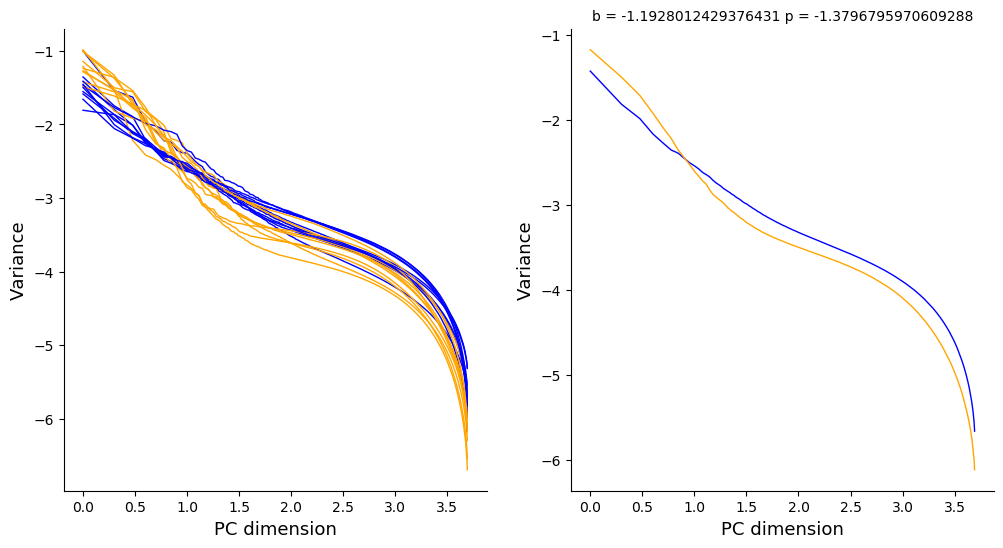

In [95]:
#BASELINE VS PTZ - ALL FISH 
fig, axarr = plt.subplots(1,2,figsize = (12,6))
for i in range(len(blnpcv)-1):
    xaxis = np.log10(np.linspace(0,np.shape(blnpcv[i])[0], num = np.shape(blnpcv[i])[0]+1))
    yaxis = np.log10(blnpcv[i])
    axarr[0].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'baseline', c = 'blue')
    xaxis = np.log10(np.linspace(0,np.shape(p20pcv[i])[0], num = np.shape(p20pcv[i])[0]+1))
    yaxis = np.log10(p20pcv[i])
    axarr[0].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'ptz20', c = 'orange')
    axarr[0].set_ylabel('Variance', size = '13')
    axarr[0].set_xlabel('PC dimension', size = '13')
    axarr[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr[0].spines['top'].set_visible(False)
    axarr[0].spines['right'].set_visible(False)

#BASELINE VS PTZ - MEAN
comb_b, comb_p = np.zeros((len(blnpcv), blnpcv[0].shape[0])),np.zeros((len(blnpcv), blnpcv[0].shape[0]))
for e in range(len(blnpcv)):
    comb_b[e], comb_p[e] = blnpcv[e], p20pcv[e]
mean_b, mean_p = np.apply_along_axis(np.mean,0,comb_b),np.apply_along_axis(np.mean,0,comb_p)

xaxis = np.log10(np.linspace(0,np.shape(mean_b)[0], num = np.shape(mean_b)[0]+1))
yaxis = np.log10(mean_b)
axarr[1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'baseline', c = 'blue')
b_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
xaxis = np.log10(np.linspace(0,np.shape(mean_p)[0], num = np.shape(mean_p)[0]+1))
yaxis = np.log10(mean_p)
axarr[1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'ptz20', c = 'orange')
p_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
axarr[1].set_ylabel('Variance', size = '13')
axarr[1].set_xlabel('PC dimension', size = '13')
axarr[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr[1].spines['top'].set_visible(False)
axarr[1].spines['right'].set_visible(False)
axarr[1].set_title('b = ' + str(b_slope) + ' p = ' + str(p_slope), size = 10)
plt.show()

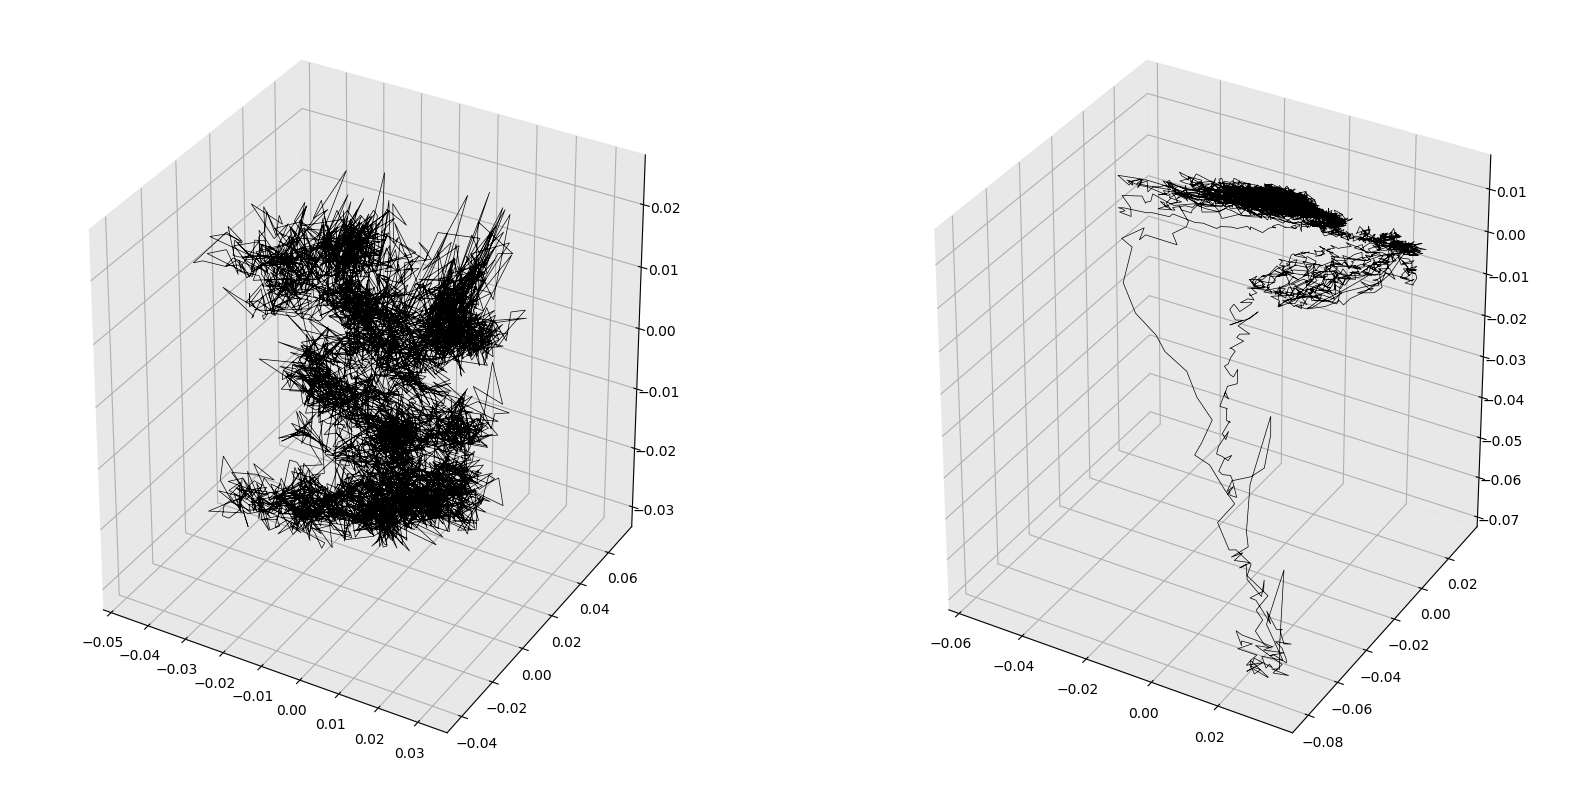

In [305]:
#Manifold smoothness
#---------------------------------
i, n_components = 9, 4
bln = np.load(blnraw[i])
p20 = np.load(p20raw[i])
#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
pca = decomposition.PCA(n_components)
fit = pca.fit(bln) 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

pca = decomposition.PCA(n_components)
fit = pca.fit(p20) 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

plt.show()

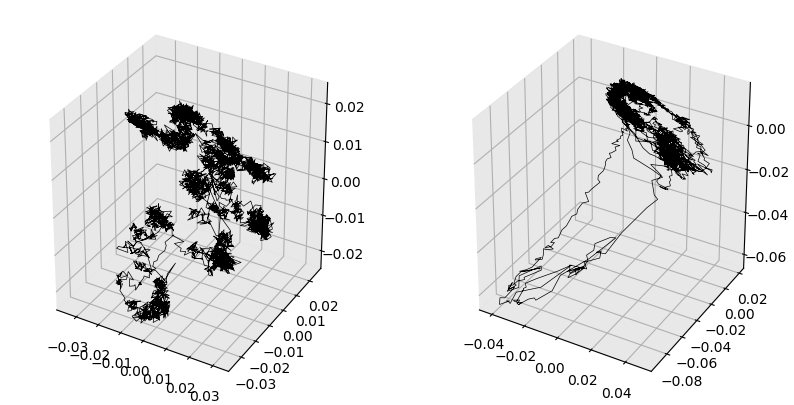

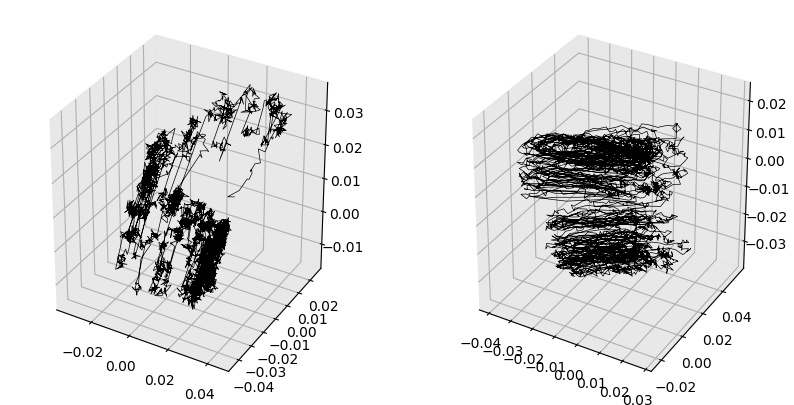

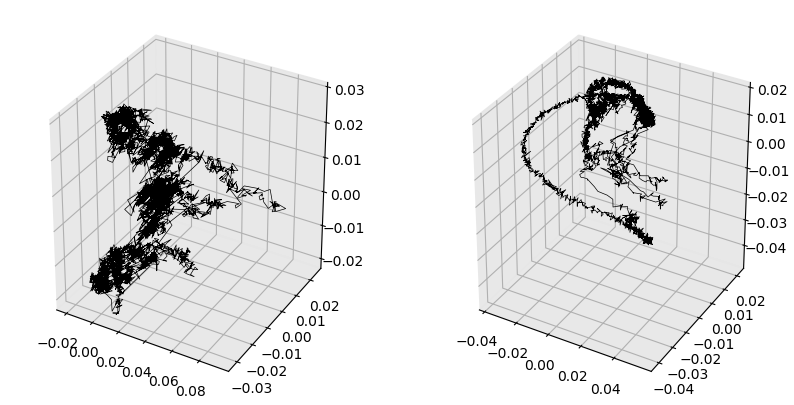

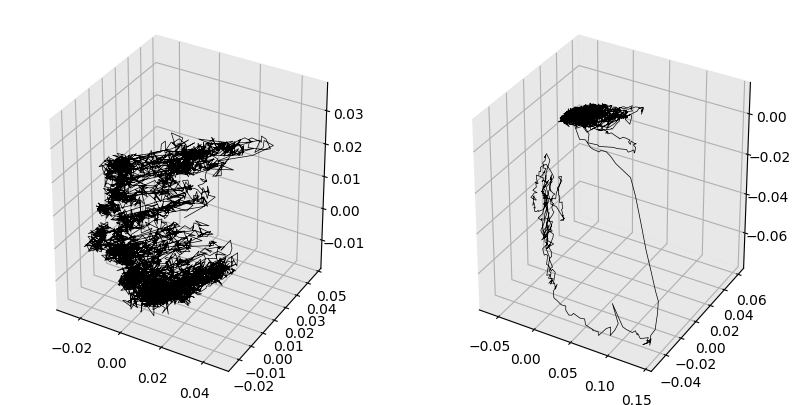

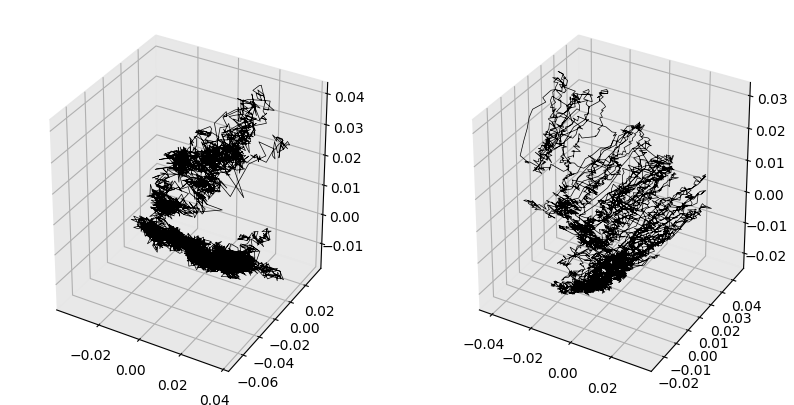

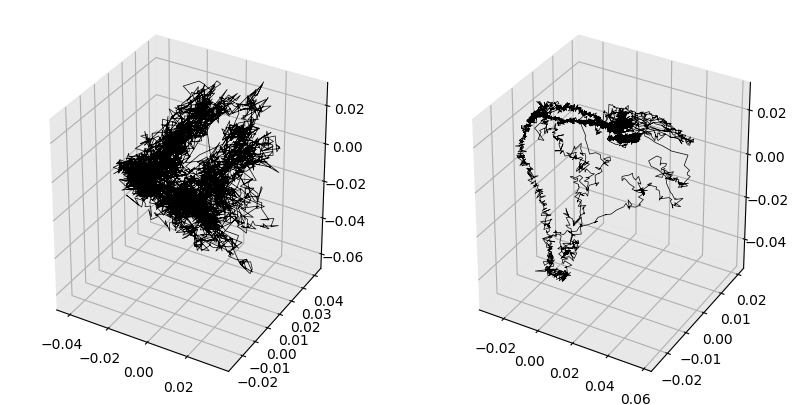

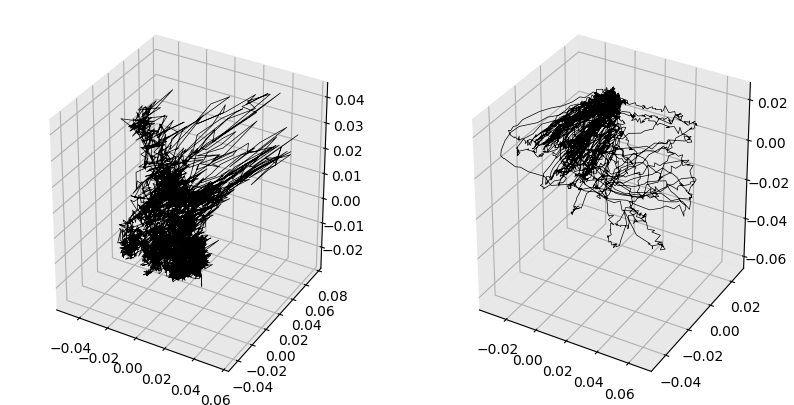

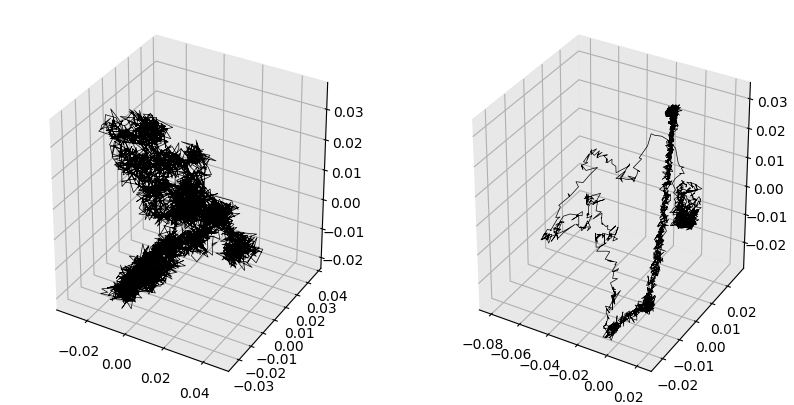

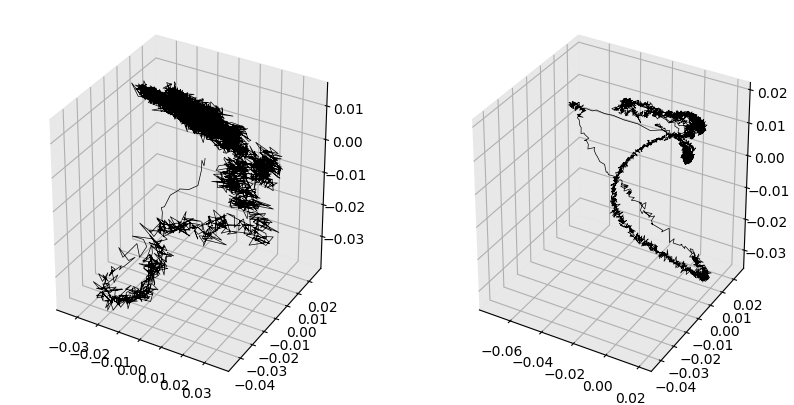

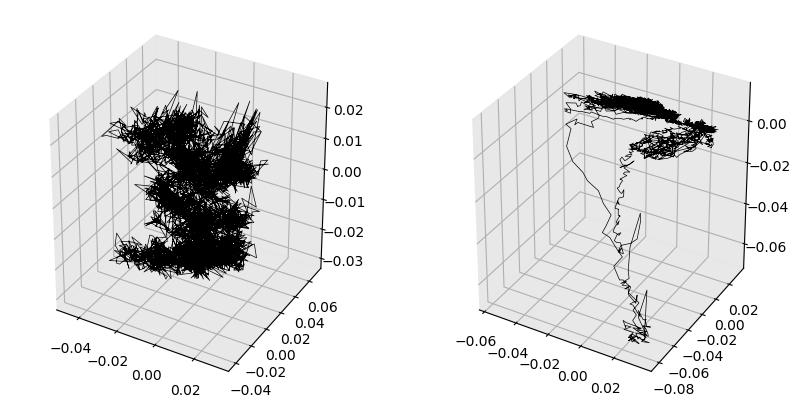

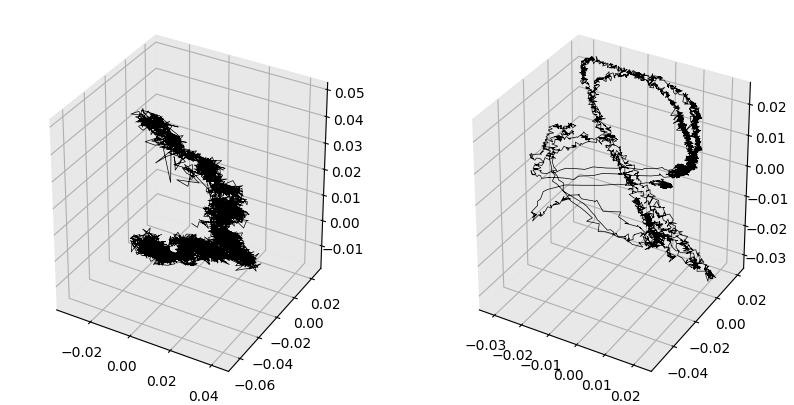

In [306]:
for i in range(len(blnraw)):
    #Manifold smoothness
    #Manifold smoothness
    #---------------------------------
    n_components = 4
    bln = np.load(blnraw[i])
    p20 = np.load(p20raw[i])
    #NON-NEGATIVE MATRIX FACTORISATION
    from sklearn import decomposition
    pca = decomposition.PCA(n_components)
    fit = pca.fit(bln) 
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(p20) 
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    plt.show()

In [76]:
stop = 100000
corr = np.triu(np.load(blncor[0]), k=0)
dis = np.triu(np.load(blndis[0]), k=0)
corrv = abs(corr.flatten())[:stop]
disv = abs(dis.flatten())[:stop]
stop = 100000
corr1 = np.triu(np.load(p20cor[0]), k=0)
dis1 = np.triu(np.load(p20dis[0]), k=0)
corrv1 = abs(corr1.flatten())[:stop]
disv1 = abs(dis1.flatten())[:stop]


In [207]:
fig, axarr = plt.subplots(figsize = (7,5))
disv_s = sorted(disv)
corrv_s = np.array([x for _,x in sorted(zip(disv,corrv))])
corr_vec, dis_vec = [],[]
for n in np.unique(disv_s):
    corr_vec = np.append(corr_vec, np.mean(corrv_s[np.where(disv_s == n)]))
    dis_vec = np.append(dis_vec, n)

xaxis = dis_vec
yaxis = corr_vec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = 'blue')

disv_s = sorted(disv1.astype(int))
corrv_s = np.array([x for _,x in sorted(zip(disv1,corrv1))])
corr_vec, dis_vec = [],[]
for n in np.unique(disv_s):
    corr_vec = np.append(corr_vec, np.mean(corrv_s[np.where(disv_s == n)]))
    dis_vec = np.append(dis_vec, n)

xaxis = dis_vec
yaxis = corr_vec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c='orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance', size = '13')
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.scatter(disv,corrv,s=1, c = 'blue', alpha = 0.1)
plt.scatter(disv1, corrv1, s=1, c = 'orangered', alpha = 0.1)
plt.show()

In [ ]:

xaxis = np.unique(durlist[i])
yaxis = sizelist[i]
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])

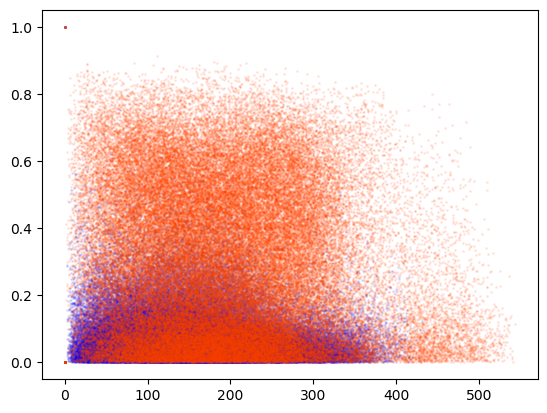

In [29]:
plt.scatter(disv,corrv,s=1, c = 'blue', alpha = 0.1)
plt.scatter(disv1, corrv1, s=1, c = 'orangered', alpha = 0.1)
plt.show()

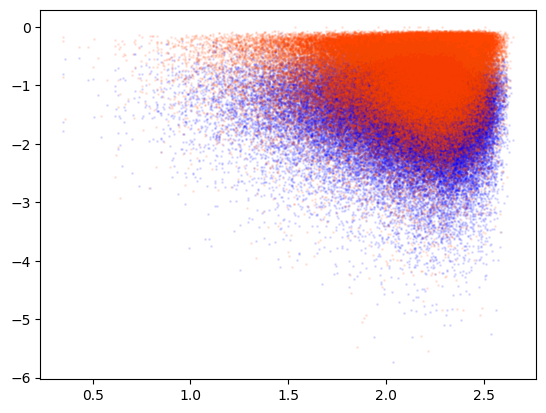

In [31]:
plt.scatter(np.log10(disv),np.log10(corrv),s=1, c = 'blue', alpha = 0.1)
plt.scatter(np.log10(disv),np.log10(corrv1),s=1, c = 'orangered', alpha = 0.1)
plt.show()

### Seizure window vs baseline/pre-ictal
* PC-variance - concatenate/average
* correlation-distance power law - concatenate/average
* manifold smoothness

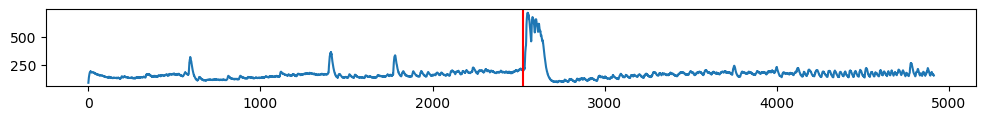

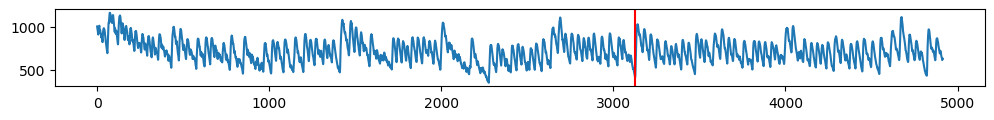

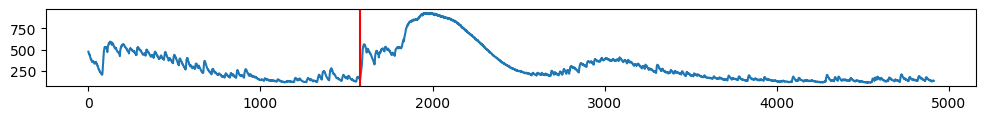

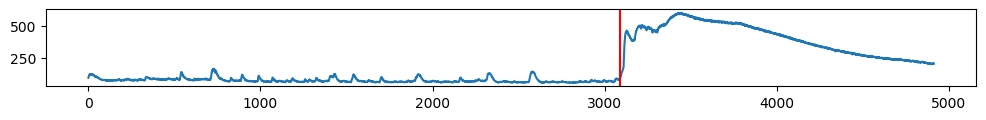

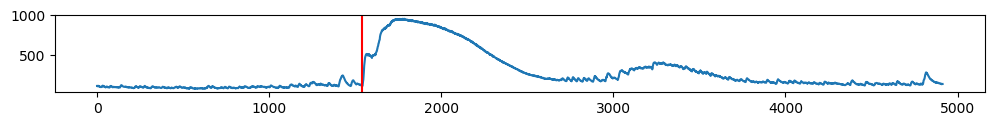

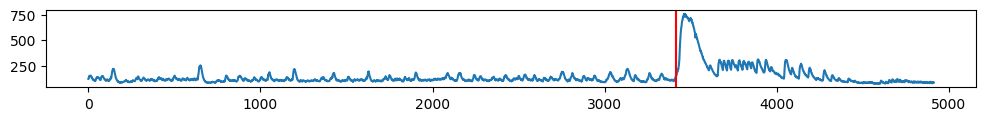

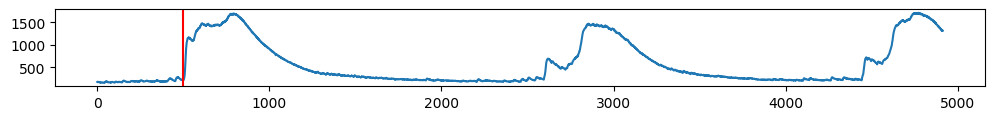

In [227]:
max_list = list(range(len(p20raw)))
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    window = adfn.window(30, mean.shape[0])
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    

    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean)
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [228]:
#baseline, pre and seizure PCA-var
blnpcv, prepcv, ppcv = list(range(len(blnraw))),list(range(len(p20raw))),list(range(len(p20raw)))
window = 500
rand_list = list(range(len(blnpcv)))
for e in range(len(blnraw)):
    bln_ran = random.randint(0,4914-window)
    rand_list[e] = bln_ran
    b_data = np.load(blnraw[0])[:,bln_ran:bln_ran+window]
    prep_data = np.load(p20raw[e])[:,max_list[e][0]-window:max_list[e][0]]
    p_data = np.load(p20raw[e])[:,max_list[e][0]:max_list[e][0]+window]
    n_components = b_data.shape[1]
    b_pca, prep_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components), decomposition.PCA(n_components)  #Define decomposition
    b_fit, prep_fit, p_fit = b_pca.fit(b_data) ,prep_pca.fit(prep_data),p_pca.fit(p_data) 
    blnpcv[e], prepcv[e], ppcv[e] = b_fit.explained_variance_ratio_, prep_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_


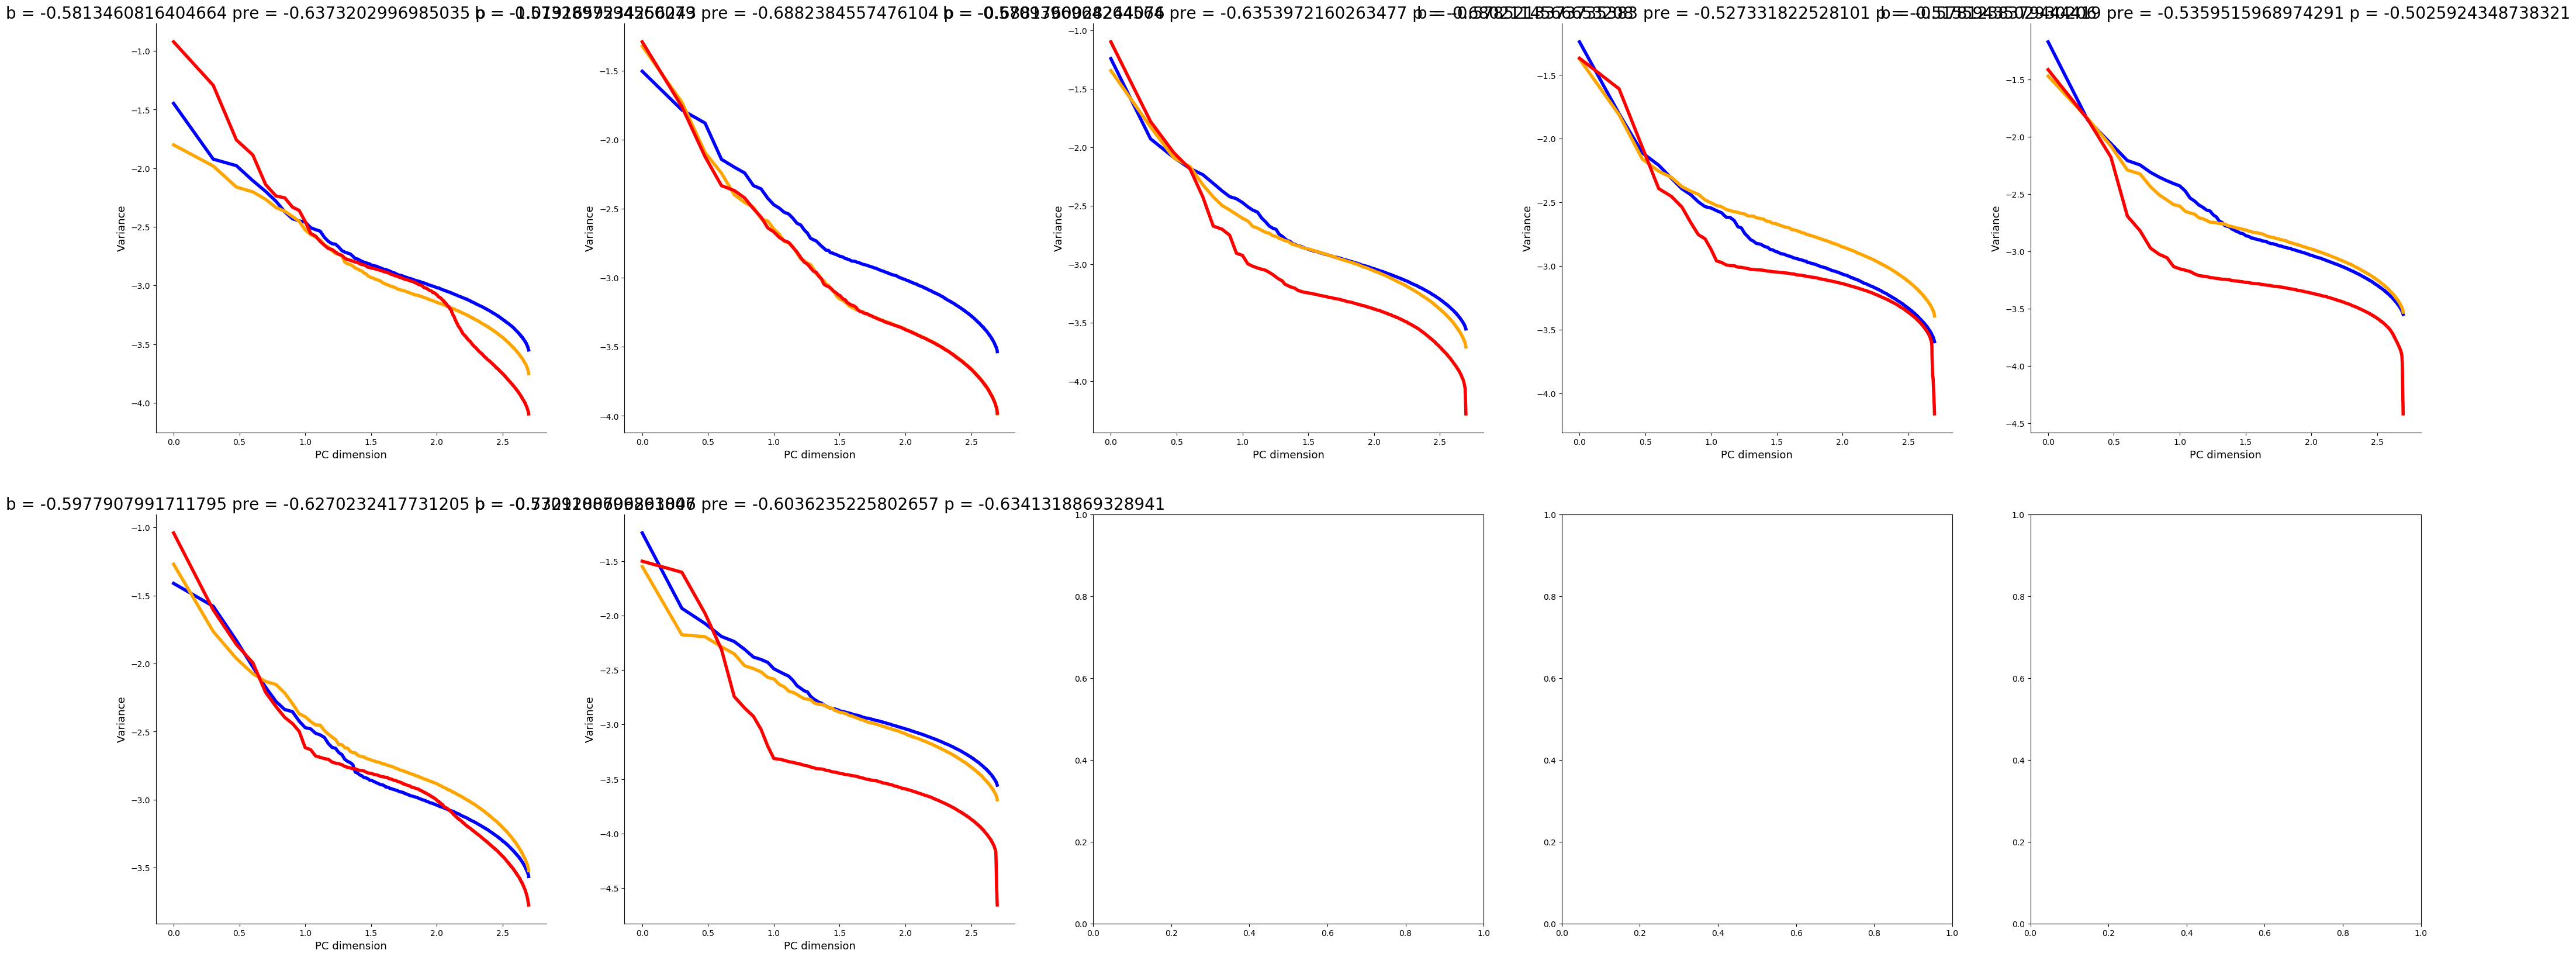

In [231]:
#BASELINE VS PTZ - ENTIRE RECORDING 
import matplotlib
import sys
from scipy import stats
fig, axarr = plt.subplots(2,5, figsize = (50,20))
xcount,ycount = 0,0
for i in range(len(blnpcv)):
    xaxis = np.log10(np.linspace(0,np.shape(blnpcv[i])[0], num = np.shape(blnpcv[i])[0]+1))
    yaxis = np.log10(blnpcv[i])
    b_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
    axarr[xcount,ycount].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, c = 'blue')
    
    xaxis = np.log10(np.linspace(0,np.shape(prepcv[i])[0], num = np.shape(prepcv[i])[0]+1))
    yaxis = np.log10(prepcv[i])
    prep_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]    
    axarr[xcount,ycount].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, c = 'orange')
    
    xaxis = np.log10(np.linspace(0,np.shape(ppcv[i])[0], num = np.shape(ppcv[i])[0]+1))
    yaxis = np.log10(ppcv[i])
    p_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0] 
    axarr[xcount,ycount].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1, c = 'red')
    
    axarr[xcount,ycount].set_ylabel('Variance', size = '13')
    axarr[xcount,ycount].set_xlabel('PC dimension', size = '13')
    axarr[xcount,ycount].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr[xcount,ycount].spines['top'].set_visible(False)
    axarr[xcount,ycount].spines['right'].set_visible(False)
    axarr[xcount,ycount].set_title('b = ' + str(b_slope) + ' pre = ' + str(prep_slope) + ' p = ' + str(p_slope), size = 20)
    ycount+=1
    if i == 4:
        xcount = 1
        ycount=0
plt.show()

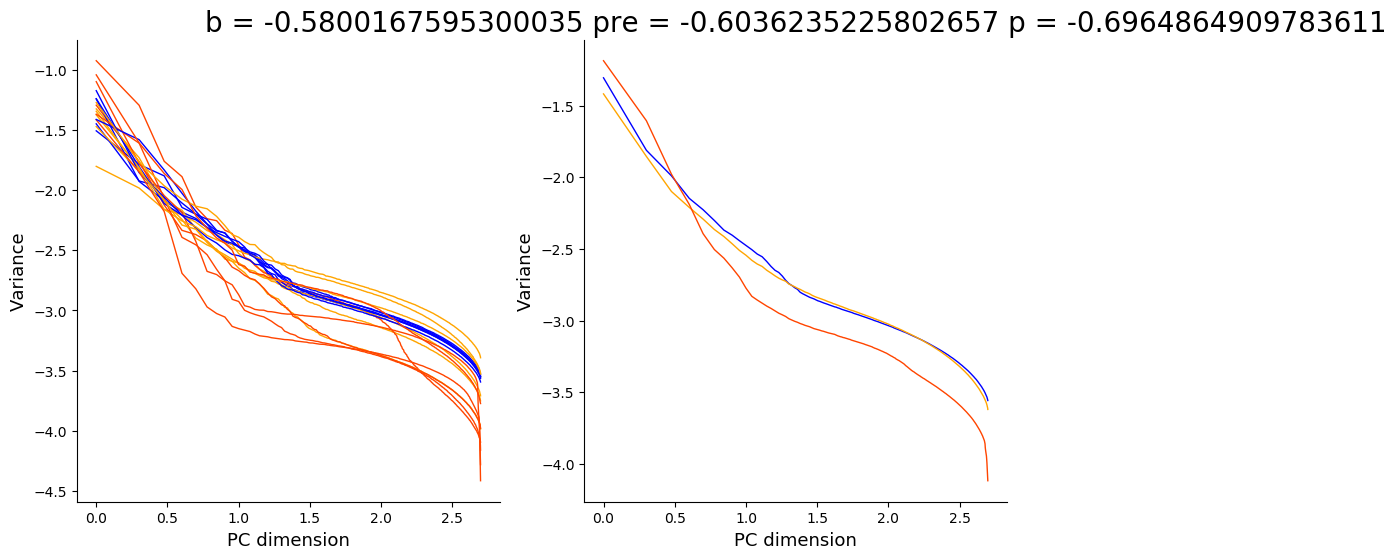

In [235]:
#BASELINE VS PRE VS SEIZURE - ALL FISH 
fig, axarr = plt.subplots(1,2,figsize = (12,6))
for i in range(len(blnpcv)-1):
    xaxis = np.log10(np.linspace(0,np.shape(blnpcv[i])[0], num = np.shape(blnpcv[i])[0]+1))
    yaxis = np.log10(blnpcv[i])
    axarr[0].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'baseline', c = 'blue')
    xaxis = np.log10(np.linspace(0,np.shape(prepcv[i])[0], num = np.shape(prepcv[i])[0]+1))
    yaxis = np.log10(prepcv[i])
    axarr[0].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'pre-seizure', c = 'orange')
    xaxis = np.log10(np.linspace(0,np.shape(ppcv[i])[0], num = np.shape(ppcv[i])[0]+1))
    yaxis = np.log10(ppcv[i])
    axarr[0].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'pre-seizure', c = 'orangered')

    axarr[0].set_ylabel('Variance', size = '13')
    axarr[0].set_xlabel('PC dimension', size = '13')
    axarr[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr[0].spines['top'].set_visible(False)
    axarr[0].spines['right'].set_visible(False)

#BASELINE VS PTZ - MEAN
comb_b, comb_pre, comb_p = np.zeros((len(blnpcv), blnpcv[0].shape[0])),np.zeros((len(blnpcv), blnpcv[0].shape[0])),np.zeros((len(blnpcv), blnpcv[0].shape[0]))
for e in range(len(blnpcv)):
    comb_b[e], comb_pre[e], comb_p[e] = blnpcv[e], prepcv[e], ppcv[e]
mean_b, mean_pre, mean_p = np.apply_along_axis(np.mean,0,comb_b),np.apply_along_axis(np.mean,0,comb_pre),np.apply_along_axis(np.mean,0,comb_p)

xaxis = np.log10(np.linspace(0,np.shape(mean_b)[0], num = np.shape(mean_b)[0]+1))
yaxis = np.log10(mean_b)
axarr[1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'baseline', c = 'blue')
b_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
xaxis = np.log10(np.linspace(0,np.shape(mean_pre)[0], num = np.shape(mean_pre)[0]+1))
yaxis = np.log10(mean_pre)
axarr[1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'pre', c = 'orange')
pre_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
xaxis = np.log10(np.linspace(0,np.shape(mean_p)[0], num = np.shape(mean_p)[0]+1))
yaxis = np.log10(mean_p)
axarr[1].plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, label = 'ptz20', c = 'orangered')
p_slope = stats.linregress(xaxis[:len(xaxis)-1][1:],yaxis[:len(xaxis)-1][1:])[0]
axarr[1].set_ylabel('Variance', size = '13')
axarr[1].set_xlabel('PC dimension', size = '13')
axarr[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr[1].spines['top'].set_visible(False)
axarr[1].spines['right'].set_visible(False)
axarr[1].set_title('b = ' + str(b_slope) + ' pre = ' + str(prep_slope) + ' p = ' + str(p_slope), size = 20)
plt.show()

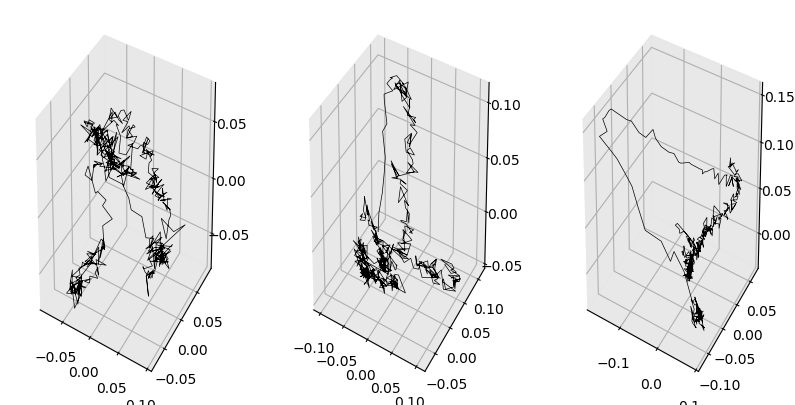

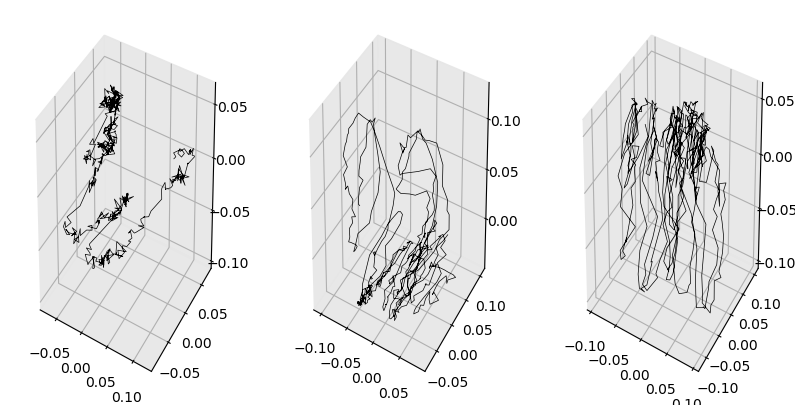

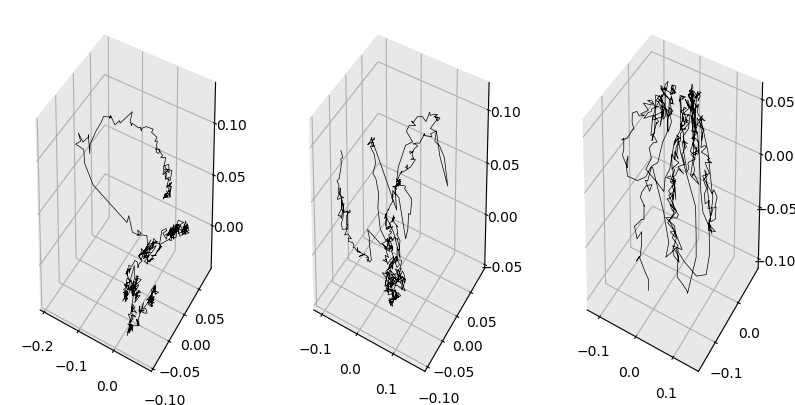

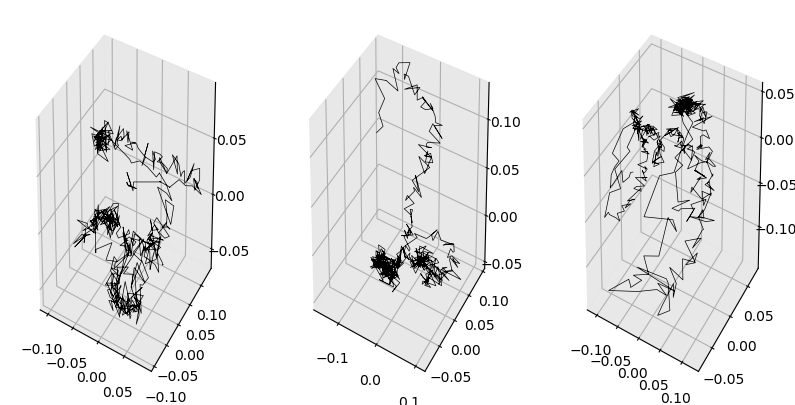

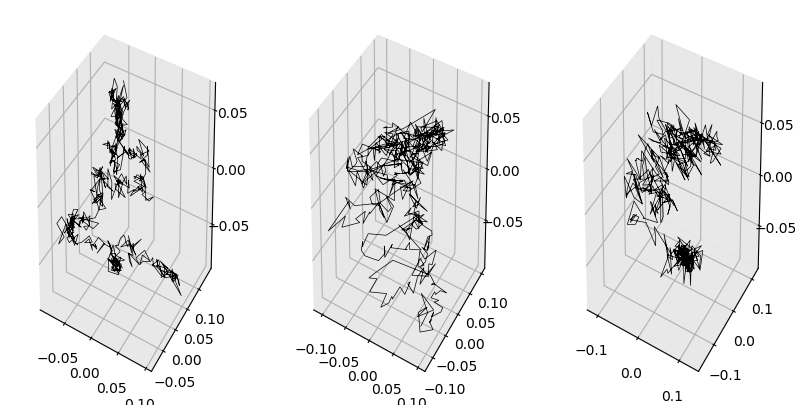

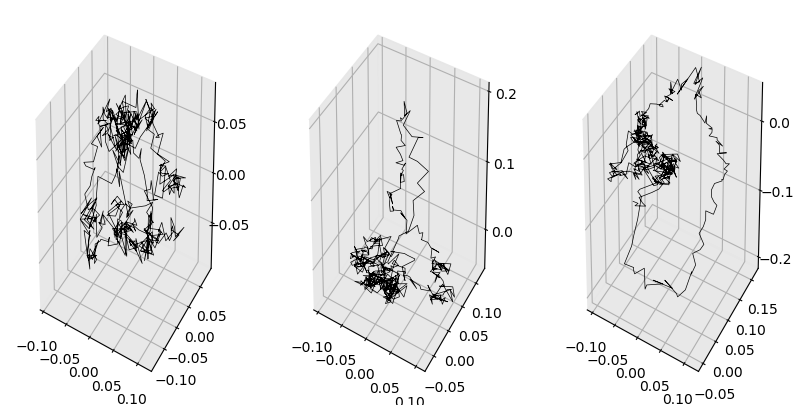

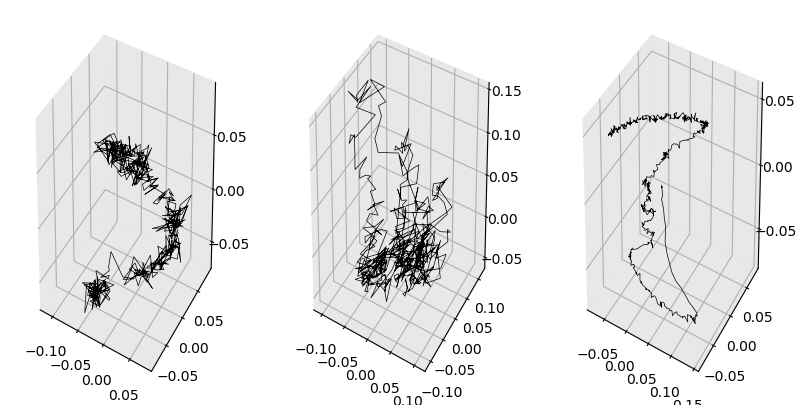

In [230]:
for i in range(len(blnraw)):
    #Manifold smoothness
    #Manifold smoothness
    #---------------------------------
    n_components = 4
    b_data = np.load(blnraw[i])[:,rand_list[i]:rand_list[i]+window]
    prep_data = np.load(p20raw[i])[:,max_list[e][0]-window:max_list[e][0]]
    p_data = np.load(p20raw[i])[:,max_list[e][0]:max_list[e][0]+window]
    #NON-NEGATIVE MATRIX FACTORISATION
    from sklearn import decomposition
    pca = decomposition.PCA(n_components)
    fit = pca.fit(b_data) 
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(prep_data) 
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(p_data) 
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    
    plt.show()

### Sliding window - entire recording
* power law plots - example fish 
* branching ratio 
* spatial map 
* manifold smoothness

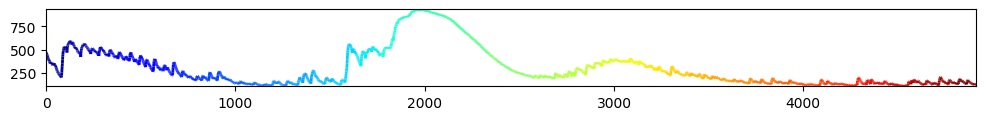

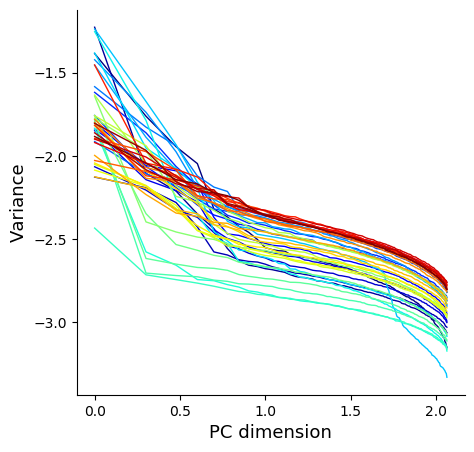

In [506]:
#PARAMETERS
choose = 2
data = np.load(p20raw[choose])
mean = np.apply_along_axis(np.mean, 0, data)
window = adfn.window(100, mean.shape[0])

#SLIDING WINDOW OVER ENTIRE TRACE
count,count1=0,0
data_list = list(range((np.int(mean.shape[0]/window))))
for e in range(np.int(mean.shape[0]/window)):
    sub_data = data[:,count:count+window]
    n_components = sub_data.shape[1]
    pca = decomposition.PCA(n_components)
    fit = pca.fit(sub_data)
    data_list[count1] = fit.explained_variance_ratio_

    count+=window
    count1+=1

    
#PLOT MEAN DIST BY SEGMENTS

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

y = mean
x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
z = np.zeros(mean.shape[0])
count=0
for i in range(len(data_list)):
    z[count:count+window] = i+1
    count+=window


# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
fig, ax = plt.subplots(figsize= (12,1))
lc = LineCollection(segments, cmap=plt.get_cmap('jet'), norm=plt.Normalize(0, len(data_list)))
lc.set_array(z)
lc.set_linewidth(2)
plt.gca().add_collection(lc)

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.show()

#BASELINE VS PTZ - ENTIRE RECORDING 
import matplotlib
import sys
from scipy import stats
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(data_list)):
    xaxis = np.log10(np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1))
    yaxis = np.log10(data_list[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1)
    
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


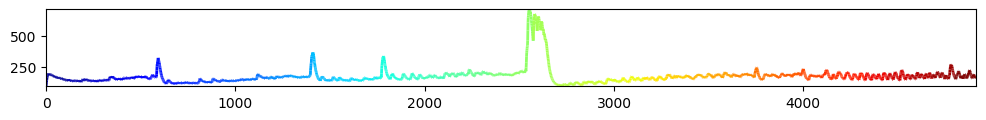

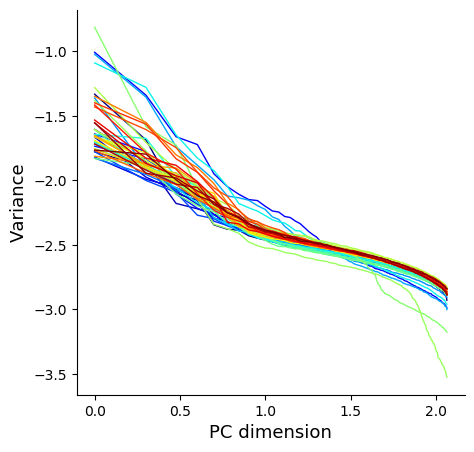

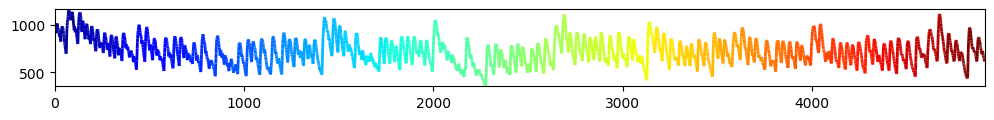

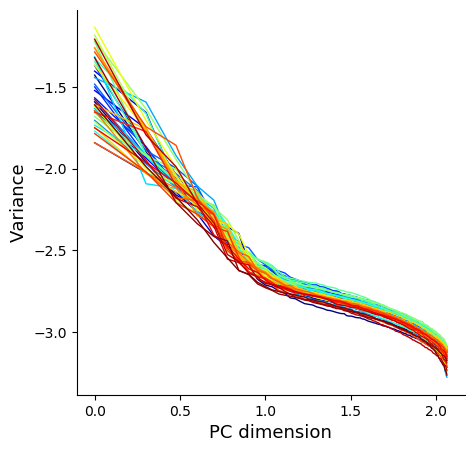

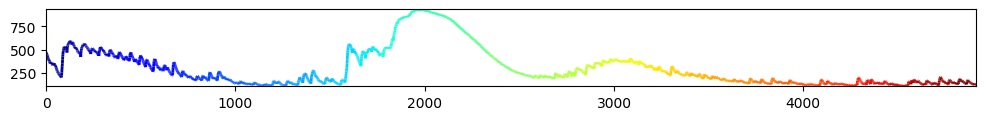

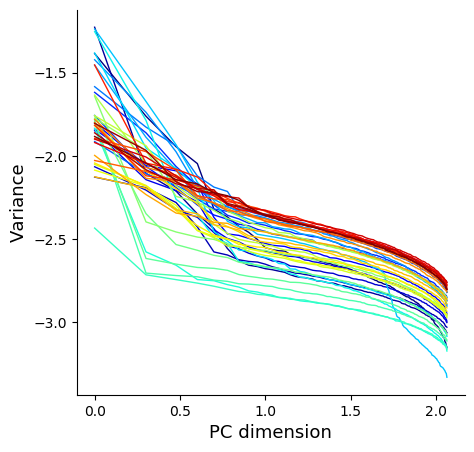

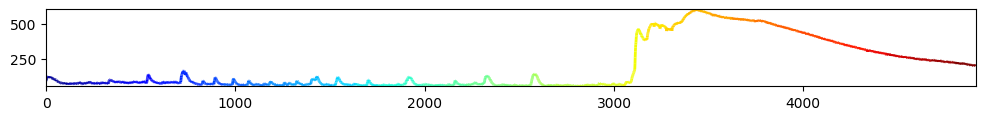

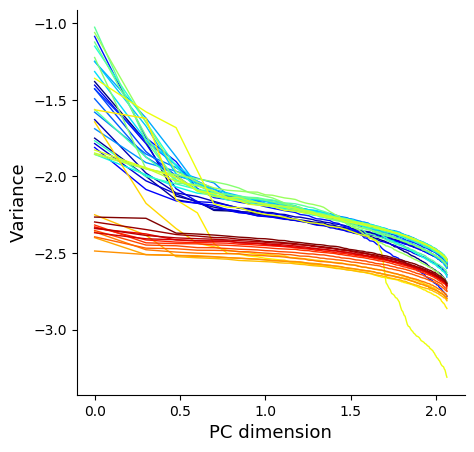

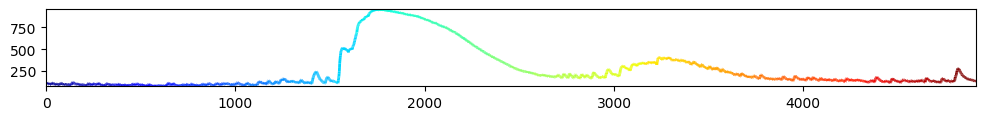

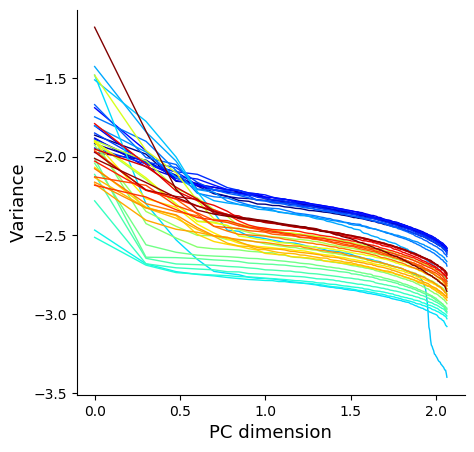

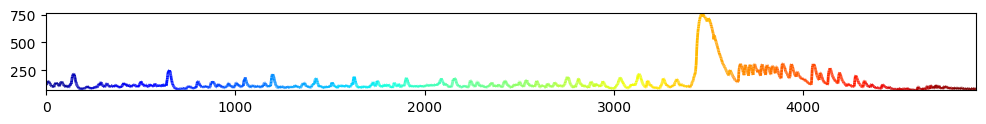

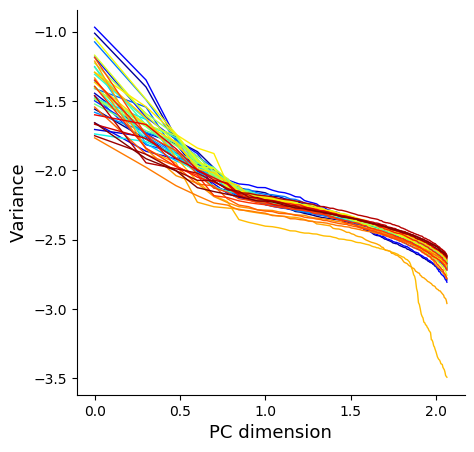

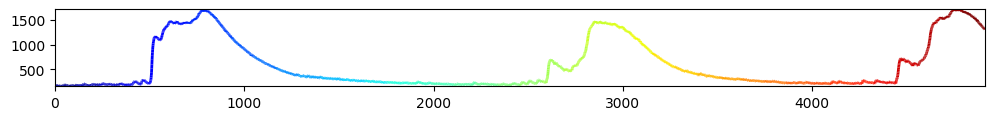

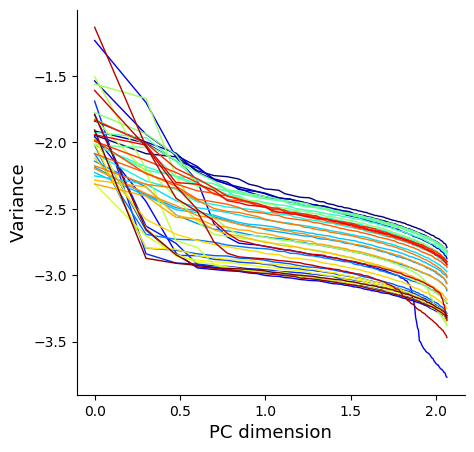

In [508]:
for o in range(len(p20raw)):
    choose = o
    data = np.load(p20raw[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(100, mean.shape[0])

    #SLIDING WINDOW OVER ENTIRE TRACE
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        n_components = sub_data.shape[1]
        pca = decomposition.PCA(n_components)
        fit = pca.fit(sub_data)
        data_list[count1] = fit.explained_variance_ratio_

        count+=window
        count1+=1


    #PLOT MEAN DIST BY SEGMENTS

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window


    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (12,1))
    lc = LineCollection(segments, cmap=plt.get_cmap('jet'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #BASELINE VS PTZ - ENTIRE RECORDING 
    import matplotlib
    import sys
    from scipy import stats
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(data_list)):
        xaxis = np.log10(np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1))
        yaxis = np.log10(data_list[i])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1)

    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC dimension', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()


### Quantify
* quantify power law likelihood
* exponent - linear regression fit or MLE
* spatial spread

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
num = '02'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*E-' + num + '*cutbinarised.npy'))
nnblist = sorted(glob.glob('*E-' + num + '*_nnb.npy')) 
pkglist =  sorted(glob.glob('*E-' + num +'*pkg*')) 
avlist =  sorted(glob.glob('*E-' + num + '*av*'))

In [4]:
#Create time series plot for different avalanches
import scipy.sparse as sp
pkg = p20
pkgs = sp.csr_matrix(p20)
mark = np.unique(pkg, return_counts=True)[0][np.unique(pkg, return_counts=True)[1] > 5][1:] #RETAIN THIS LIST FOR PLOTTING REFERENCE - avalanches with more than 3 cells (can be 3 cells in one time frame, or 3 time frames one cell)
avtime = list(range(mark.shape[0])) #list - each element = 2xarray - 1d: number of cells, 2d: frame number

for t in range(mark.shape[0]):
    avt = np.unique(sp.find(pkgs == mark[t])[1]) #unique time points
    avary = np.zeros((2, len(avt))) #2xarray - 1d: number of cells, 2d: frame number
    count = 0
    for e in avt:
        findmark = pkgs == mark[t]
        avary[0,count] = len(sp.find(findmark)[0][np.where(sp.find(findmark)[1] == e)])
        avary[1,count] = e
        count+=1
    avtime[t] = avary #avtime list is ordered from lowest avalanche number to highest (REMEMBER ONLY TAKING AVALANCHES WITH MORE THAN 2 CELLS)

In [16]:
#Identify plotting interval
amount = '[:,:3000]'
#find range of avalanches in chosen plotting range
for e in range(len(avtime)):
    if np.max(avtime[e][1]) > 3000:
        cutoff = e
        break 

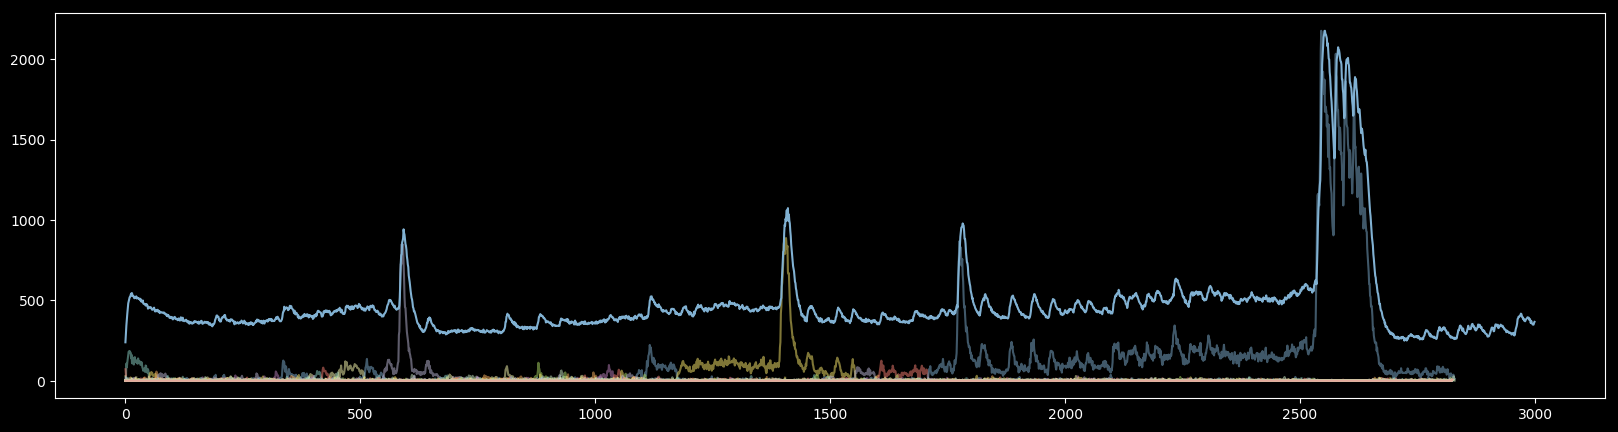

In [189]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
num = '02'
os.chdir(Fdrop + 'Project/' + experiment)
deltalist = sorted(glob.glob('*E-02*PTZ20*_deltaff.npy'))
f, axarr = plt.subplots(figsize = (20,5))
f.subplots_adjust(hspace=0)
cut = eval('np.load(deltalist[0])' + amount)
maxiar = []
for i in range(cutoff):
    plustime = np.min(avtime[i][1])
    #plt.yscale('log')
    plt.plot(np.append(np.zeros(np.int(plustime)),avtime[i][0]), alpha = 0.5)
    maxiar = np.append(maxiar, avtime[i][0])
    
average = (np.apply_along_axis(np.mean, 0, cut))
normav = average * (np.max(maxiar)/np.max(average))
#plt.yscale('log')
plt.plot(normav)
plt.show()

In [332]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
num = '02'
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*E-*' + num + '*PTZ20*realcoord.npy'))
coordlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realcoord.npy']

In [201]:
mini = 500
count = 0
avvec = []
#find range of avalanches in chosen plotting range
for e in range(len(avtime)):
    if np.sum(avtime[e][0]) > mini:
        avvec = np.append(avvec, e)
        count+=1
cutoff = count
print(count)

21


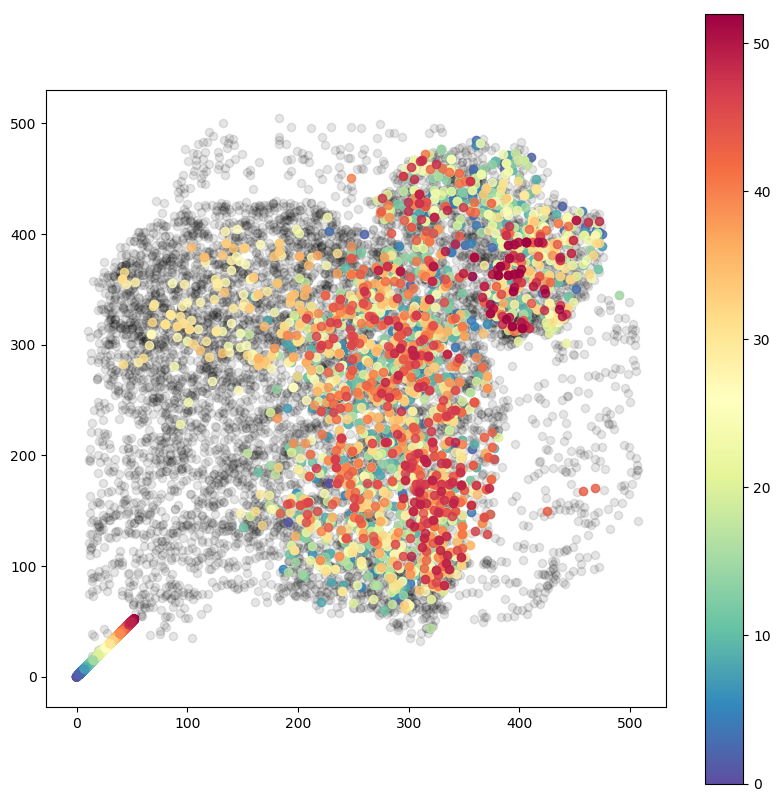

In [295]:
#PLOT AVALANCHEs
#--------------
from cycler import cycler
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Spectral_r(np.linspace(0,1,len(np.unique(time)))))
avnum = 0
markme = mark[np.int(avvec[avnum])]
time = np.where(pkg == markme)[1]
cells =  np.where(pkg == markme)[0]
coordz = np.load(coordlist[0])
fig, ax = plt.subplots(figsize= (10,10))
master = plt.scatter(coordz[:,0], coordz[:,1], s=35, c = 'k', alpha = 0.1)
for t in np.unique(time):
    dotplot = plt.scatter(coordz[cells[np.where(time == t)]][:,0], coordz[cells[np.where(time == t)]][:,1], s=35, alpha = 0.8)

    
data = time
dataplot = plt.scatter(data, data, c = data, cmap = 'Spectral_r')
fig.colorbar(dataplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.show()

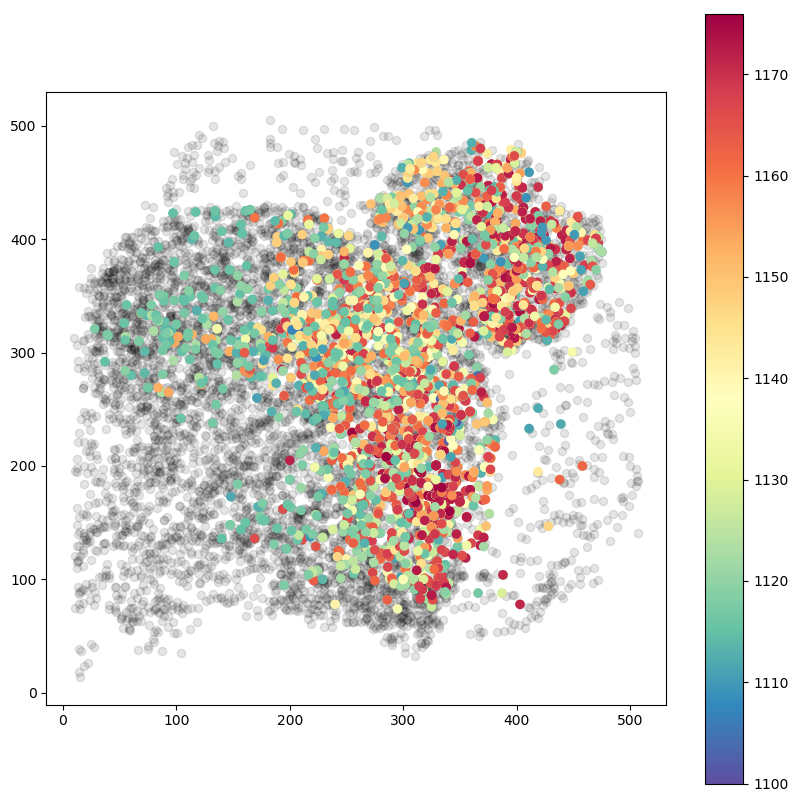

In [333]:
#PLOT AVALANCHEs
#--------------
avnum = 15
markme = mark[np.int(avvec[avnum])]
time = np.where(pkg == markme)[1]
cells =  np.where(pkg == markme)[0]
coordz = np.load(coordlist[0])
fig, ax = plt.subplots(figsize= (10,10))
master = plt.scatter(coordz[:,0], coordz[:,1], s=35, c = 'k', alpha = 0.1)
dotplot = plt.scatter(coordz[cells][:,0], coordz[cells][:,1], c = time, cmap = 'Spectral_r', s=35, alpha = 1)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
os.chdir(Ffig)
plt.savefig('avalanche_large.svg', transparent = True)
plt.show()


In [ ]:
#ANIMATION
#-------------------------------
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(10,10))
plt.xlim(0, 300)
plt.ylim(0, 300)

def animate(i):
    #select data range
    p = plt.scatter(x=c [:,0], y=c [:,1], c=DFF[:,i],vmin =0.01, vmax = 0.2)
    return(p)
   
ani = animation.FuncAnimation(fig, animate, frames=10, repeat=False)
HTML(ani.to_html5_video())